# Importer et Trainer le reseau

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True)

indices = np.random.randint(0, 1, 1000)   
sampler = torch.utils.data.sampler.SubsetRandomSampler(indices)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self):
        self.cifar10 = datasets.CIFAR10(root='./data',
                                        download=True,
                                        train=False,
                                        transform=transforms.ToTensor())
        
    def __getitem__(self, index):
        data, target = self.cifar10[index]
        
        # Your transformations here (or set it in CIFAR10)
        
        return data, target, index

    def __len__(self):
        return len(self.cifar10)

dataset = MyDataset()
loader = DataLoader(dataset,
                    batch_size=1,
                    shuffle=True,
                    num_workers=1)

Files already downloaded and verified


In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

**Trainer le classique reseau**

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,   64,  3)
        self.conv2 = nn.Conv2d(64,  128, 3)
        self.conv3 = nn.Conv2d(128, 256, 3)
        self.avgpool = nn.AvgPool2d(2, stride=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.avgpool(x)
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [0]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.234
[1,  4000] loss: 2.062
[1,  6000] loss: 1.986
[1,  8000] loss: 1.844
[1, 10000] loss: 1.787
[1, 12000] loss: 1.725
[1, 14000] loss: 1.684
[1, 16000] loss: 1.638
[1, 18000] loss: 1.590
[1, 20000] loss: 1.536
[1, 22000] loss: 1.500
[1, 24000] loss: 1.486
[1, 26000] loss: 1.467
[1, 28000] loss: 1.441
[1, 30000] loss: 1.421
[1, 32000] loss: 1.365
[1, 34000] loss: 1.368
[1, 36000] loss: 1.322
[1, 38000] loss: 1.332
[1, 40000] loss: 1.335
[1, 42000] loss: 1.291
[1, 44000] loss: 1.263
[1, 46000] loss: 1.210
[1, 48000] loss: 1.261
[1, 50000] loss: 1.203
[2,  2000] loss: 1.194
[2,  4000] loss: 1.159
[2,  6000] loss: 1.159
[2,  8000] loss: 1.105
[2, 10000] loss: 1.127
[2, 12000] loss: 1.106
[2, 14000] loss: 1.106
[2, 16000] loss: 1.114
[2, 18000] loss: 1.095
[2, 20000] loss: 1.077
[2, 22000] loss: 1.108
[2, 24000] loss: 1.016
[2, 26000] loss: 1.007
[2, 28000] loss: 0.993
[2, 30000] loss: 1.000
[2, 32000] loss: 1.031
[2, 34000] loss: 1.035
[2, 36000] loss: 1.019
[2, 38000] 

In [20]:
#Whole dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 66 %


In [18]:
torch.save(net, 'net.pth')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type AvgPool2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MaxPool2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist

In [0]:
net = torch.load('net.pth')

# Descente de Gradient Projetée (PGD)

FGSM est un processus en une étape pour générer des adversaires. Il donne assez bien et rapidement des adversaires, mais ce n'est certainement pas la meilleure méthode disponible pour le faire. Une variante plus forte de cette attaque serait la Descente de Gradient Projetée (PGD).

Nous faisons une projection sur la fonction de perte négative :

$$x^{t+1} = \Pi_{x+S}(x^t+\alpha*sign(\bigtriangledown _xL(\theta,x,y)))$$

In [0]:
def pgd_attack(model, image, label, eps, step, iters=10) :
    loss_fn = nn.CrossEntropyLoss()
        
    ori_image = image.data
        
    for i in range(iters) :    
        image.requires_grad = True
        predicted = model(image)

        model.zero_grad()
        loss = loss_fn(predicted, label)
        loss.backward()

        #Gradient calculation
        adv_image = image + step*image.grad.sign()

        # Project back into l_norm ball and correct range
        eta = torch.clamp(adv_image - ori_image, min=-eps, max=eps)
        image = torch.clamp(ori_image + eta, min=0, max=1).detach_()
            
    return image

Test sur une image

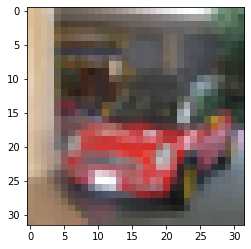

    c a r
    c a r


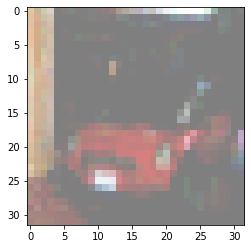

  d e e r


In [52]:
# get random training image
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show orginal image
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels]))
outputs = net(images)
_, predicted = torch.max(outputs.data, 1) #killer
print(' '.join('%5s' % classes[predicted]))

# Show Attack image
images_adv = pgd_attack(net, images, labels, 0.3, 0.01)
imshow(torchvision.utils.make_grid(images_adv))
outputs = net(images_adv) #Label calculation
_, predicted = torch.max(outputs.data, 1) #killer
print(' '.join('%5s' % classes[predicted]))

**Évaluer les exemples contradictoires**

Dans un premier temps, nous évaluons la précision obtenue en fonction d'Epsilon et du pas de gradient.
Nous commençons par l'espion d'abord.

In [44]:
epsl = np.array([0, 0.001, 0.01, 0.03, 0.1, 0.3, 1])
epsl
#Whole dataset
resAccTr = []
for e_i in epsl:
  correct = 0
  total = 0
  for data in testloader:
          images, labels = data
          images = pgd_attack(net, images, labels, e_i ,step = 0.01)
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  taux = correct / total
  resAccTr.append(taux)
  print('Accuracy: %d %%' % (
      100 * taux))

Accuracy: 31 %
Accuracy: 30 %
Accuracy: 22 %
Accuracy: 11 %
Accuracy: 1 %
Accuracy: 1 %
Accuracy: 0 %


Text(0.5, 1.0, 'Accuracy in function of eps (test dataset)')

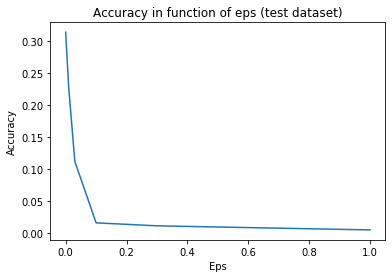

In [54]:
plt.plot(epsl, resAccTr)
plt.xlabel('Eps')
plt.ylabel('Accuracy')
plt.title('Accuracy in function of eps (test dataset)')

Nous constatons que plus l4eps est grand, plus la précision de notre modèle diminue, donc plus d'exemples adverses sont générés. Nous pouvons prendre eps = 0,3 (la precision obtenue est 1%).

Nous étudions ensuite la différence de précision en fonction du pas de gradient.

In [47]:
stepl = np.array([0, 0.001, 0.01, 0.03, 0.1, 0.3, 1])
#Whole dataset
stepAcc = []
for step_i in stepl:
  correct = 0
  total = 0
  for data in testloader:
          images, labels = data
          images = pgd_attack(net, images, labels, eps = 0.3 , step_i)
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  taux = correct / total
  stepAcc.append(taux)
  print('Accuracy: %d %%' % (
      100 * taux))

Accuracy: 31 %
Accuracy: 22 %
Accuracy: 1 %
Accuracy: 0 %
Accuracy: 0 %
Accuracy: 0 %
Accuracy: 1 %


Text(0.5, 1.0, 'Accuracy in function of step gradient (test dataset)')

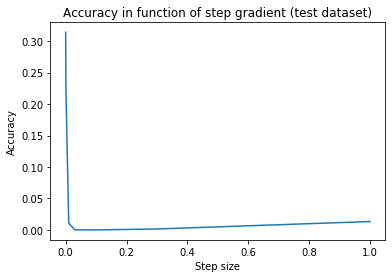

In [53]:
plt.plot(stepl, stepAcc)
plt.xlabel('Step size')
plt.ylabel('Accuracy')
plt.title('Accuracy in function of step gradient (test dataset)')

On trouve qu'il faut choisir une valeur soit pas trop petite, soit pas trop grande pour l'étape de gradient afin d'obtenir un bon résultat.

En résumé, nous avons obtenu de bons résultats avec le PGD.